<a href="https://colab.research.google.com/github/mkorlyakova/MSTU-courses/blob/main/ML%20magister/10/ML_Lab_4_5_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 4.5

# Понижение размерности

## Содержание методического пособия:


<ol>
<li>Теоретические подходы к понижению размерности</li>
<li>Селекция на практике</li>
<li>Редукция на практике</li>
</ol>

## **Алгоритмы снижения размерности**

### **Отбор признаков**

### Одномерные методы



Самым простым и примитивным методом отбора является _одномерный отбор признаков_. Он заключается в оценке предсказательной силы каждого признака, то есть его информативности - насколько он коррелирует с целевой переменной. Затем отбираются либо заданное количество $k$ признаков, либо те признаки, информативность которых выше некоторого порога.

Оценка предсказательной силы признака (или степени связи этого признака и целевой переменной) может проводиться разными методами, например:

- в случае регрессии - _корреляция_ $$R_{j} = \frac{\sum_{i=1}^{l}(x_{ij} - \bar{x}_{j})(y_{i} - \bar{y})}{\sqrt{\sum_{i=1}^{l}(x_{ij} - \bar{x}_{j})^{2}\sum_{i=1}^{l}(y_{i} - \bar{y})^{2}}},$$ где $\bar{x_{j}}$ и $\bar{y}$ - среднее значение $j$-го признака и целевой переменной, соответственно. Чем больше по модулю корреляция ($\pm 1$), тем информативнее признак. Следует заметить, что этот метод учитывает только линейную связь между признаком и целевой переменной.


- в случае задачи классификации - _взаимная информация (mutual information)_, моделирующая корреляцию между признаками и классами. Она использует в расчете вероятность того, что одновременно значение $j$-го признака $x_{ij}$ равно числу $v$ и значение целевой переменной $y_{i}=k$, или, другими словами, долю таких объектов от общего количества объектов в выборке $P(x=v,y=k)$. Тогда взаимная информация будет находиться как $$MI_{j}=\sum_{v \in X}\sum_{k \in Y}P(x=v,y=k)\text{log}\frac{P(x=v,y=k)}{P(x=v)P(y=k)}.$$ Здесь $P(x=v)$ и $P(y=k)$ - доли объектов, на которых значение признака равно $v$ и значение целевой переменной равно $k$, соответственно. Если признак и целевая переменная независимы, то взаимная информация обращается в ноль. В отличие от предыдущего метода, этот метод позволяет находять произвольные зависимости (в т.ч. нелинейные) в пространстве произвольной размерности.

Такие методы позволяют оценить важность исключительно каждого признака отдельно, без учета влияния комбинаций признаков на целевую переменную, поэтому они и называются одномерными. На практике зачастую признаки влияют именно в совокупности, и по отдельности могут ошибочно быть расценены как некоррелирующие с целевой переменной, поэтому одномерные методы отбора не являются оптимальным методом в большинстве случаев.

**sklearn реализация:**

 - SelectKBest - удаляет все признаки, кроме
признаков с наивысшими оценками (https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest)

 - SelectPercentile - удаляет все признаки, кроме
признаков указанного пользователем процента с наивысшей оценкой (https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile).

в качестве теста(фильтра) используют функцию, которая возвращает одномерные оценки:

  - Для регрессии: **r_regression, f_regression,mutual_info_regression**

  - Для классификации: **chi2, f_classif, mutual_info_classif**


    - mutual_info_regression, mutual_info_classif - для разреженных данных
    - chi2 - для частот (положительны)



**Пример 1**
Использование фильтрации признаков по статистическим критериям:




In [ ]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")
# df = pd.read_csv(path + "kc_house_data.csv")
#
#
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
df = housing.frame
print(df.shape)


X, y = housing.data, housing.target

(20640, 9)


In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
features = list(df.columns[:-1])
target = df.columns[-1]


In [ ]:
features, target

(['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'MedHouseVal')

In [ ]:
#разделим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,features], df[target], random_state=0)

In [ ]:
X_new = SelectKBest(f_classif, k=2).fit_transform(X_train, y_train.values.reshape(-1, 1))

In [ ]:
regressor = Pipeline([
    ('features',SelectKBest(f_classif, k=2)),
    ('classifier', LinearRegression()),
])

In [ ]:
#обучим наш пайплайн
regressor.fit(X_train, y_train)

Pipeline(steps=[('features', SelectKBest(k=2)),
                ('classifier', LinearRegression())])

In [ ]:
predictions =  regressor.predict(X_test)

mean_absolute_error(y_pred=predictions, y_true=y_test), r2_score(y_pred=predictions, y_true=y_test)

(0.6276273555202263, 0.46143404335937077)

###  Переборные методы

Отдельной группой методов можно назвать так называемые _переборные методы_, которые дискретно оценивают качество модели, обученной на различных подмножествах признаков. При этом происходит полный перебор всех возможных вариантов. Обычно такие алгоритмы делятся на _жадные (greedy)_ и _нежадные (non-greedy)_.

**Не Жадные алгоритмы**

Примером не жадного алгоритма может быть простой последовательный полный перебор всех возможных подмножеств признаков. Такой подбор позволяет найти наиболее оптимальное подмножество признаков, но, очевидно, он является достаточно трудоемким (нужно перебрать $2^{n}$ вариантов, где $n$ - число признаков), поэтому подходит только для датасетов с небольшим количеством признаков.

**Жадные алгоритмы (ADD, DEL)**

Жадность алгоритмов заключаются в том, что если один из признаков включен в подмножество (или исключен в случае исключающего метода), в следующих итерациях поиска он уже не учитывается, так что алгоритм работает на меньшем объеме данных. Известные алгоритмы этого типа - _жадное включение_ и _жадное исключение_. В случае жадного включения на первой итерации аналогично одномерному отбору признаков находится признак, обладающий наибольшей предсказательной силой и добавляется в формирующуееся подмножество $\{i_{1}\}$. Далее происходит перебор оставшихся признаков с попеременным добавлением каждого из них в подмножество к первому и оценкой качества получаемой модели, обученной на подмножестве из этих двух признаков $\{i_{1}, i_{2}\}$. В итоге в подмножестве остается тот признак, при добавлении которого получается наилучшее качество. Далее эта процедура повторяется до момента, пока ошибка получаемой модели уменьшается. На каждой итерации в подмножество добавляется один признак, максимально улучшающий работу модели. Если на какой-то итерации при добавлении признаков ошибка не уменьшается, процесс останавливается.

Плюсом такого алгоритма является относительная быстрота и возможность учета некоторых взаимодействий между признаками (как раз то, чего лишен одномерный отбор). Минусом же можно назвать вероятность застрять в локальном минимуме ошибки, если такой есть. В случае же когда есть единственный глобальный минимум, алгоритм найдет оптимальное решение.

Есть также модификации этого алгоритма с многократным проходом по выборке и поочередным включением/исключением признаков из подмножества для учета совокупного влияния признаков.

**sklearn**

SequentialFeatureSelector (SFS) . SFS может быть как прямым, так и обратным (cikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html#sklearn.feature_selection.SequentialFeatureSelector):

 - Forward-SFS — это жадная процедура ADD.
 - Процедура останавливается, когда достигается желаемое количество выбранных функций, определенное параметром n_features_to_select.

 - Backward-SFS - это жадная процедура DEL.

 - Параметр directi onопределяет, используется ли прямой или обратный SFS.

**Пример 2.** Оценка по модели ADD

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector


sfs = SequentialFeatureSelector(LinearRegression(), n_features_to_select=5)

regressor = Pipeline([
    ('features',sfs),
    ('classifier', LinearRegression()),
])

#обучим наш пайплайн
regressor.fit(X_train, y_train)
print(regressor[0].get_support()) # покажем какие признаки используем для работы

predictions =  regressor.predict(X_test)

mean_absolute_error(y_pred=predictions, y_true=y_test), r2_score(y_pred=predictions, y_true=y_test)


[ True  True False  True False False  True  True]


(0.5450679511473714, 0.5817247554632563)

### Методы обертки

Встроенные в модели методы оценки информативности. Они используют эвристики, заложенные в обучающие модели, для оценки важности признаков.

- Например, в случае работы с линейными моделями мы имеем зависимость целевой переменной от взвешенной суммы признаков $$a(x) = \sum_{i=1}^{n}w_{i}x^{i}.$$ Здесь, если признаки масштабированы, веса будут являться показателями информативности признаков: чем больше вес, тем больший вклад данный признак вносит в значение целевой переменной. На основе этого показателя можно проводить отбор признаков. Также, вспоминая уроки по линейным моделям, можно упомянуть, что использование $L_{1}$-регуляризации приводит к занулению весов наименее важных признаков, то есть к их отбрасыванию, при этом больший коэффициент регуляризации будет приводить к большему количеству зануленных весов.

- В случае использования решающих деревьев и их композиций, где в каждой вершине происходит разбиение на два поддерева путем сравнивания значения одного признака с некоторым значением порога, важность признака можно оценивать по тому, насколько он уменьшает значение критерия информативности, по которому оценивается качество разбиения: $$Q(X_{m}, j, t) = H(X_{m}) - \frac{|X_{l}|}{|X_{m}|}H(X_{l}) - \frac{|X_{r}|}{|X_{m}|}H(X_{r}),$$ где $X_{m}$ - множество объектов, попавших в вершину на данном шаге, $X_{l}$ и $X_{r}$ - множества, попадающие в левое и правое поддерево, соответственно, после разбиения. $H(X)$ - критерий информативности.
    
    Чем сильнее падает критерий информативности при разбиении по данному признаку (то есть чем выше $Q$), тем этот признак важнее. Таким образом, важность $j$-го признака можно оценить путем вычисления суммы уменьшений критерия информативности по всем вершинам, в которых делалось разбиение по данному признаку. Чем больше эта сумма, тем важнее данный признак был при построении дерева. В случае композиций деревьев этот показатель суммируется по всем деревьям.

**Пример 3**. использование моделей для оценки информативности признаков от свойств модели

Соберем пайплайн

In [ ]:
#соберем наш простой pipeline, но нам понадобится написать класс для выбора нужного поля
class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.column]

class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]

class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in self.columns:
            if col_ not in test_columns:
                X[col_] = 0
        return X[self.columns]



continuous_columns = features
final_transformers = list()

for cont_col in continuous_columns:
    cont_transformer = Pipeline([
                ('selector', NumberSelector(key=cont_col)),
                ('scaler', StandardScaler())
            ])
    final_transformers.append((cont_col, cont_transformer))

feats = FeatureUnion(final_transformers)

feature_processing = Pipeline([('feats', feats)])

Модель - линейная регрессия

In [ ]:
regressor = Pipeline([
    ('features',feats),
    ('classifier', LinearRegression()),
])

In [ ]:
#обучим наш пайплайн
regressor.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('MedInc',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='MedInc')),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('HouseAge',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='HouseAge')),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('AveRooms',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='AveRooms')),
                                                                 ('scaler',
                                                                  Standar...
                                                                  StandardScaler())])),
                                                ('AveOccup',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='AveOccup')),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('Latitude',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='Latitude')),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('Longitude',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='Longitude')),
                                                                 ('scaler',
                                                                  StandardScaler())]))])),
                ('classifier', LinearRegression())])

In [ ]:
predictions =  regressor.predict(X_test)

mean_absolute_error(y_pred=predictions, y_true=y_test), r2_score(y_pred=predictions, y_true=y_test)

(0.5368950735045218, 0.5911695436410489)

Оценим влиятельность признака от модели:

  - чем больше значение коэффициента по модулю, тем значительней
  - MedInc - самый важный, Population - самый слабый

In [ ]:
intercept = regressor[1].intercept_
features = pd.DataFrame(regressor[1].coef_,
                        continuous_columns,
                        columns=['coefficient'])
features.head()

,coefficient
MedInc,0.831899
HouseAge,0.120937
AveRooms,-0.261752
AveBedrms,0.304052
Population,-0.008736


оценка признаков по ансамблю xgboost

In [ ]:
import xgboost as xgb

In [ ]:
regressor = Pipeline([
    ('features',feats),
    ('classifier', xgb.XGBRegressor()),
])

#обучим наш пайплайн
regressor.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('MedInc',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='MedInc')),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('HouseAge',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='HouseAge')),
                                                                 ('scaler',
                                                                  StandardScaler())])),
                                                ('AveRooms',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='AveRooms')),
                                                                 ('scaler',
                                                                  Standar...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [ ]:
predictions =  regressor.predict(X_test)

mean_absolute_error(y_pred=predictions, y_true=y_test), r2_score(y_pred=predictions, y_true=y_test)

(0.3083096090537118, 0.8346263132148625)

Оценим влиятельность признака от модели:

  - чем больше значение коэффициента по модулю, тем значительней
  - MedInc - самый важный, Population - самый слабый

In [ ]:
xgb_features = pd.DataFrame(regressor[1].feature_importances_,
                        continuous_columns,
                        columns=['coefficient'])
xgb_features.head()

,coefficient
MedInc,0.497094
HouseAge,0.069314
AveRooms,0.045033
AveBedrms,0.025707
Population,0.021495


### Оценка по модели

Используем вариант оценки через модель от sklearn:

**sklearn**

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html#sklearn.feature_selection.SelectFromModel
SelectFromModel— это метапреобразователь, который можно использовать вместе с любым оценщиком (присваивает важность каждой функции через атрибут оценщика (например coef_, , feature_importances_).

Признаки считаются неважными и удаляются, если соответствующая важность признаков ниже заданного threshold или указания «mean», «median».

max_features - параметр, ограничение на количество выбираемых объектов.

In [ ]:
from sklearn.feature_selection import SelectFromModel


In [ ]:
regressor = Pipeline([
    ('features',feats),
    ('features_select',SelectFromModel(estimator=LinearRegression())), # используем регуляризацию
    ('classifier', xgb.XGBRegressor()),
])
regressor =  regressor.fit(X_train, y_train) # тут может быть любая модель
print(regressor[1].get_support()) # покажем список используемых признаков (True -  используется, False - нет)
predictions =  regressor.predict(X_test)

mean_absolute_error(y_pred=predictions, y_true=y_test), r2_score(y_pred=predictions, y_true=y_test)


[ True False False False False False  True  True]


(0.314671999197411, 0.8265959115281486)

__________________________________________________________


### Отбор с использованием модели

**Permutation importance**


- обучаем модель на тренировочном наборе данных
- проверяем качество на валидации
- для валидационного набора данных перемешиваем один из признаков
- снова проверяем качество на нем же

Признак считается «важным», если качество модели падает при его перемешивании (более продвинутый вариант https://www.section.io/engineering-education/getting-started-with-boruta-algorithm/).



**Пример 4.**




In [ ]:
from sklearn.inspection import permutation_importance

regressor = Pipeline([
    ('features',feats),
    ('classifier', xgb.XGBRegressor()),
])
regressor =  regressor.fit(X_train, y_train) # тут может быть любая модель
r = permutation_importance(regressor, X_test, y_test,
                            n_repeats=30,
                            random_state=0)

Интересно, что результаты немного другие, нежели при использовании "встроенного" feature_importances_). Берем признаки с более высоким значением параметра важности

In [ ]:
for i in r.importances_mean.argsort()[::-1]:
    print(f"{continuous_columns[i]:<8} "
    f"{r.importances_mean[i]:.3f}"
    f" +/- {r.importances_std[i]:.3f}")

Latitude 1.677 +/- 0.024
Longitude 1.481 +/- 0.028
MedInc   0.340 +/- 0.008
AveOccup 0.140 +/- 0.005
AveRooms 0.110 +/- 0.003
HouseAge 0.047 +/- 0.003
AveBedrms 0.014 +/- 0.002
Population 0.009 +/- 0.001


## Задание 1

Самостоятельно оценить данные по варианту (или любой рабочий набор данных для классификации с числом объектов больше 500):

Обратите внимание, что все модели в примерах - РЕГРЕССИЯ!!!, для классификаторов следует использовать модели для отбора признаков классификаторы.


In [ ]:
from  sklearn import datasets

V1 = datasets.load_wine()
V2 = datasets.load_digits()
V3 = datasets.load_breast_cancer()
V4 = datasets.make_classification(n_samples = 10000, n_features=5, n_redundant=2, n_informative=2,random_state=10, n_clusters_per_class=2)
V5 = datasets.fetch_covtype(return_X_y=True)
V6 = datasets.make_blobs(n_samples=10000, centers=2, n_features=5, random_state=10)
V7 = datasets.make_circles(n_samples=10000, factor=0.5, noise=0.05)
V8 = datasets.make_moons(n_samples=10000, noise=0.05)

 1.1.Загрузить данные  по варианту

 1.2.Построить модель в формате sklearn с использованием механизма пайплайнов (https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline).

 1.3. Выбрать метрику (учитываем балансировку данных и смысл задачи) и оценить качество модели на отложенной выборке

 1.4. сделать выводы о качестве для модели на основе выбранной метрики

 1.5. Отделить для каждой модели по 50% признаков на основе фильтрации признаков (Пример 1) , построить модель и  сделать выводы о качестве для модели на основе выбранной метрики

 1.6. Отделить для каждой модели по 50% признаков на основе отбора ADD(DEL) признаков (Пример 2) , построить модель и  сделать выводы о качестве для модели на основе выбранной метрики

 1.7. Отделить для каждой модели по 50% признаков на основе анализа важности по модели (Пример 3) , построить модель и  сделать выводы о качестве для модели на основе выбранной метрики

  1.8. Отделить для каждой модели по 50% признаков на основе анализа важности по модели через алгоритм пермутации(Пример 4) , построить модель и  сделать выводы о качестве для модели на основе выбранной метрики



## Задание 2

2.1 постройте кривые ROC или PR (см. ЛР1) и оцените ROC-AUC или PR-AUC всех моделей на одном графике.

2.2. обоснуйте выбор метода отбора признаков по результатам анализа этого графика

## Задание 3


3.1 Примените методы отбора признаков для задачи распознавания лиц(из результатов ЛР4) (оставить по 150 признаков в каждом варианте)

3.2. Сравните эффективность редукции набора признаков по РСА и селекции признаков (для лучшего варианта из 150 признаков)

3.3. Попробуйте объяснить результат

In [ ]:
from sklearn.datasets import fetch_lfw_people # изображения лиц людей (медийно известные персоны)
faces = fetch_lfw_people(min_faces_per_person=60)  # берем 60 фотографий на персону
print(faces.target_names)  #  покажем список полученых персон
print(faces.images.shape)  #  размеры данных (картинки 62 на 47 пикселей)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


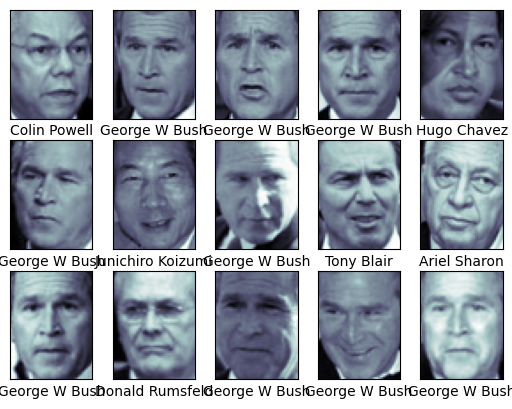

In [ ]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [ ]:

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline # сборка конвейера обработки.

# сделаем преобразование
pca = PCA(n_components=150, whiten=True, random_state=42)

Xtrainf, Xtestf, ytrainf, ytestf = train_test_split(faces.data, faces.target,
                                                random_state=42)

pca.fit(Xtrainf)

Xtrainf_pca = pca.transform(Xtrainf)
Xtrainf_pca = pca.transform(Xtestf)

1) Делаем отбор признаков из Xtrainf, Xtestf.

2) Обучаем модель на редуцированном наборе после селекции

3) сравниваем с обучением модели на наборе Xtrainf_pca, Xtrainf_pca

## Дополнительные материалы

Feature selection:

1. RFE - recursive feature elimination (есть в sklearn https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py)
2. Boruta - shadow features (https://www.section.io/engineering-education/getting-started-with-boruta-algorithm/)
3. Target permutation
4. Варианты вложений на наборе digit https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html

Вопросы:

1. Какую проблему решает сокращение числа признаков
2. Какие проблемы возникают при сокращении числа признаков
3. Какую сложность имеет поиск оптимального набора k признаков признаков из исходного набора n признаков
4. Опишите достоинства и недостатки методов одномерного отбора
5. Опишите достоинства и недостатки методов векторной селекции
6. Опишите модель идею алгоритма пермутации признаков
7. Опишите процесс выбора необходимого числа признаков с использованием алгоритма ADD
8. Поясните особенности результатов работы алгоритмов с неполным перебором вариантов наборов признаков
9. Поясните особенности методов фильтрации признаков(одномерного отбора)
10. оцените роль регуляризации при выборе признаков в целевой набор.